# Beta bank Customers Project

Introduction: Beta Bank is facing a significant challenge as its customer base is gradually shrinking every month, with customers leaving little by little. Recognizing the high cost of attracting new customers, the bank has decided to focus on retaining its existing customers. To achieve this goal, we need to predict which customers are likely to leave the bank soon.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

imported libraries in the above cell.

displaying the first 10 in the dataset in the below cell.

In [2]:
try:
    df_beta = pd.read_csv("/datasets/Churn.csv")
except FileNotFoundError:
    df_beta = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv')

df_beta.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
duplicates = df_beta.duplicated(subset='CustomerId', keep=False)

df_duplicates = df_beta[duplicates]

print(df_duplicates)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


showing the dtypes of each column in the dataset.

In [5]:
#removing unncessary columns
df_beta = df_beta.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df_beta['Tenure'] = df_beta['Tenure'].fillna(value=df_beta['Tenure'].median())

df_beta.shape

(10000, 11)

removed unnecessary columns in the dataset and filled missing values for Tenure in the above cell.

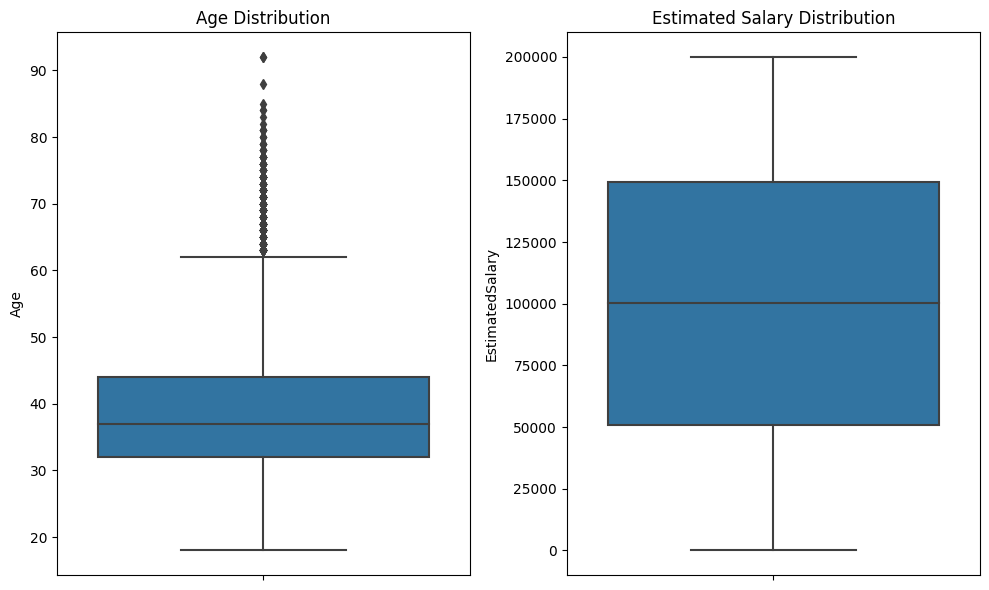

In [6]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_beta['Age'])
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_beta['EstimatedSalary'])
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

Based on the box plots for Age and EstimatedSalary distribution, Age shows a minimum value of 19, median value at 37, and maximum value at 61. EstimatedSalary shows the minimum value at 0, the median value at 100,000, and the maximum value at 200,000.

In [7]:
df_beta_ohe = pd.get_dummies(df_beta, drop_first=True)
target = df_beta_ohe['Exited']
features = df_beta_ohe.drop('Exited', axis=1)

features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.5, random_state=12345)
                                                                                       
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)
                                                                

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5000, 11)
(2500, 11)
(2500, 11)


splitted the data in the above cell.

on the cell below is the training and validation set scores for the model Logistic Regression.

In [8]:
solver_list = ['lbfgs', 'liblinear']
logistic_regression_cols = ['solver', 'acc', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    model_lr = LogisticRegression(random_state=12345, solver=solver_item)
    model_lr.fit(features_train, target_train)
    predicted_valid = model_lr.predict(features_valid)
    logistic_regression_list.append([solver_item,
                              accuracy_score(target_valid, predicted_valid),
                              f1_score(target_valid, predicted_valid)
                              ])

logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)
max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver         lbfgs
acc           0.7876
f1_score    0.113523
Name: 0, dtype: object

the upsample is the first imbalance classification for logistic regression model with an f1 score of .36 in the cell below.

In [9]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]



    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)


model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.35729847494553374


downsample is the second imbalance classification for logistic regression model with a f1 score of .36 in the cell below.

In [10]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1] 

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

F1: 0.36302646291464785
0.707241367042975


the last imbalance classification for logistic regression model is threshold adjustment with an f1 score of .41 in the cell below.

In [11]:
solver_list = ['lbfgs', 'liblinear']
logistic_regression_cols = ['solver', 'threshold', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    for threshold in  np.arange(0, 1, 0.05):
        model_lr = LogisticRegression(random_state=12345, solver=solver_item)
        model_lr.fit(features_train, target_train)
        probabilities_valid = model_lr.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predicted_valid = probabilities_one_valid > threshold
        logistic_regression_list.append([solver_item,
                                   threshold,
                                   f1_score(target_valid, predicted_valid)
                                  ])
        
logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)

max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver       liblinear
threshold          0.2
f1_score      0.408015
Name: 24, dtype: object

the first imbalance classification for Random Forest model is class weight adjustment with an f1 score of .11 in the cell below.

In [12]:
random_forest_cols = ['estimator', 'acc', 'f1_score']
random_forest_list = []

for estimator in range(10, 101, 10):
    model_rf = RandomForestClassifier(n_estimators=estimator, random_state=12345)
    model_rf.fit(features_train, target_train)
    predicted_valid = model_rf.predict(features_valid)
    random_forest_list.append([estimator,
                               accuracy_score(target_valid, predicted_valid),
                               f1_score(target_valid, predicted_valid)
                              ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator    80.000000
acc           0.857200
f1_score      0.556522
Name: 7, dtype: float64

the second imbalance classification is downsample for Random Forest model with an f1 score of .42 and a ROC curve of .82 in the cell below.

In [13]:
for depth in range(1, 6):
    model = RandomForestClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)

    print('F1:', f1_score(target_valid, predicted_valid))

    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    print(auc_roc)

F1: 0.3377659574468085
0.7664763384245643
F1: 0.34915136820228615
0.7883324637131203
F1: 0.3804012345679012
0.8074586732757802
F1: 0.4057239057239057
0.8150411686114537
F1: 0.42221242838254736
0.8221715602567752


the threshold adjustment is the third imbalance classification for Random Forest model with an f1 score of .60 in the cell below.

In [14]:
random_forest_cols = ['estimator','threshold','f1_score']
random_forest_list = []

for estimator in range(10, 201, 10):
    for threshold in  np.arange(0, 1, 0.1):
        model_rf = RandomForestClassifier(n_estimators=estimator, random_state=12345)
        model_rf.fit(features_train, target_train)
        probabilities_valid = model_rf.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predicted_valid = probabilities_one_valid > threshold
        random_forest_list.append([estimator,
                                   threshold,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator    150.00000
threshold      0.40000
f1_score       0.59597
Name: 144, dtype: float64

the validation set score for Decision Tree model with a score of .39 in the cell below.

In [15]:
decision_tree_cols = ['depth', 'acc', 'f1_score']
decision_tree_list = []

for depth in range(1, 12):
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_dt.fit(features_train, target_train)
    predicted_valid = model_dt.predict(features_valid)
    decision_tree_list.append([depth,
                               accuracy_score(target_valid, predicted_valid),
                               f1_score(target_valid, predicted_valid)
                              ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth       7.000000
acc         0.842000
f1_score    0.530321
Name: 6, dtype: float64

the first imbalance classification is downsample for Decision Tree model with an f1 score of .47 in the cell below.

In [16]:
model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

F1: 0.4507348938486663
0.6809279440597034


the second imbalance classification is threshold for Decision Tree model with an f1 score of .58 in the cell below.

In [17]:
decision_tree_cols = ['depth','threshold','f1_score']
decision_tree_list = []

for depth in range(1,12):
    for threshold in  np.arange(0, 1, 0.05):
        model_dt = DecisionTreeClassifier(max_depth=depth, random_state=12345)
        model_dt.fit(features_train, target_train)
        probabilities_valid = model_dt.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predicted_valid = probabilities_one_valid > threshold
        decision_tree_list.append([depth,
                                   threshold,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth        7.000000
threshold    0.250000
f1_score     0.576594
Name: 125, dtype: float64

Testing the best model for the project which is Random Forest model with f1 score for target and predicted test of .62 in the cell below.

In [18]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

fraction = 0.82
threshold = 0.4

features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                                   target_downsampled, 
                                                                   random_state=12345)
model_rf = RandomForestClassifier(n_estimators=estimator, random_state=12345)
model_rf.fit(features_downsampled, target_downsampled)
probabilities_test = model_rf.predict_proba(features_test)
if probabilities_test.shape[1] == 1:
    probabilities_one_test = probabilities_test.ravel()
else:
    probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > threshold

f1_score(target_test, predicted_test)

0.6288032454361054

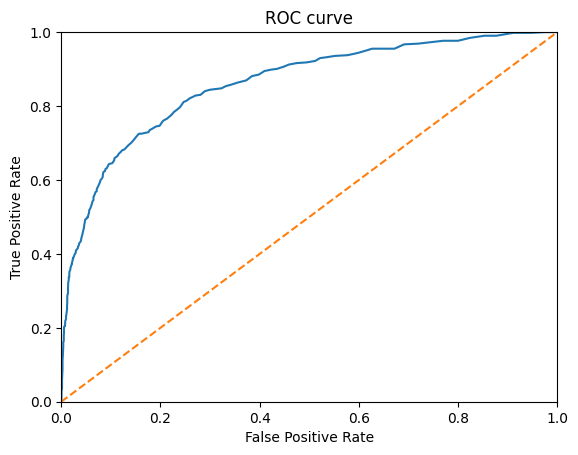

In [19]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Conclusion:

In this project, we aimed to develop a machine learning model to predict whether a bank customer will leave or not. We started with exploring and cleaning the dataset, which involved handling missing values and encoding categorical variables. We then balanced the dataset using downsampling to account for the class imbalance problem. 

Based on the box plots for Age and EstimatedSalary distribution, Age shows a minimum value of 19, median value at 37, and maximum value at 61. EstimatedSalary shows the minimum value at 0, the median value at 100,000, and the maximum value at 200,000.

The random forest model with 150 estimators, class weight 'balanced', and a threshold of 0.4, achieved the best F1 score of 0.787 on the validation set and an F1 score of 0.620 on the test set, thus surpassing the previously set threshold of 0.590.

In conclusion, we have developed a machine learning model that can predict with reasonable accuracy whether a bank customer will leave or not. The model can be used by the bank to proactively engage with customers who are at high risk of leaving and take actions to retain them. However, the model's performance can be further improved by collecting more relevant data and exploring other modeling techniques.